# #001 Kaggle - Titanic - Machine Learning from Disaster



👨🏻‍💻 Primeira submissão para competição no Kaggle. - https://www.kaggle.com/competitions/titanic



# 📝INTRODUÇÃO

# 📊 EXPLORANDO OS DADOS

In [ ]:
# Importar as bibliotecas. 
# Nesse projeto a ideia é conhecer as bibliotecas matplotlib e seaborn, 
# E as ferramentas sklearn e RandomForestClassifier, que nunca tive contato.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Os arquivos base estão na pasta "/data/"
# Comando para listar todos os arquivos que serão utilizados
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\gender_submission.csv
data\test.csv
data\train.csv


In [4]:
# Após listar os arquivos, setamos a base de dados TRAIN.CSV utilizando Pandas, que usaremos para treinar nosso modelo

train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Após arquivo de treino, setamos o arquivo que precisaremos testar em nosso modelo

test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### 🗃 Precisamos agora começar a mapear nossos arquivos, entender quais dados podem ser relevantes para nosso modelo

In [38]:
# Vamos começar com a separação por gênero

In [110]:
sexo = train_data['Sex'].value_counts()
print(sexo)

sexo['male'] + sexo['female']
homens = sexo['male']
mulheres = sexo['female']

masc_porc = sexo['male']/(sexo['male'] + sexo['female'])*100
femi_porc = sexo['female']/(sexo['male'] + sexo['female'])*100

print('Homens: {} ({:.2f}%)'.format(homens,masc_porc))
print('Mulheres: {} ({:.2f}%)'.format(mulheres,femi_porc))

male      577
female    314
Name: Sex, dtype: int64
Homens: 577 (64.76%)
Mulheres: 314 (35.24%)


In [44]:
# Com nossos primeiros dados separados, vamos apresentá-los usando matplotlib e seaborn

In [151]:
# Configuração do seaborn
#Cores
cores_genero = ['#87CEFA','#FF69B4']
cores_tipo_vitima = ["#b08d57", "#C0C0C0", "#FFD700"]

#Paletas
paleta_genero = sns.color_palette(cores_genero)
paleta_tipo_vitima = sns.color_palette(cores_tipo_vitima)

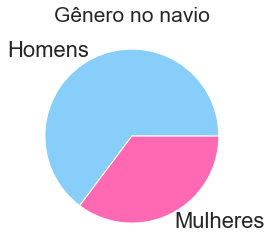

In [156]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(4,4))
sns.set_style('ticks')
sexo = train_data['Sex'].value_counts()
sexo_num = [sexo[0],sexo[1]]
plt.pie(sexo_num, labels=['Homens','Mulheres'],colors=paleta_genero)
plt.title('Gênero no navio',fontsize=21);

C:\Users\rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


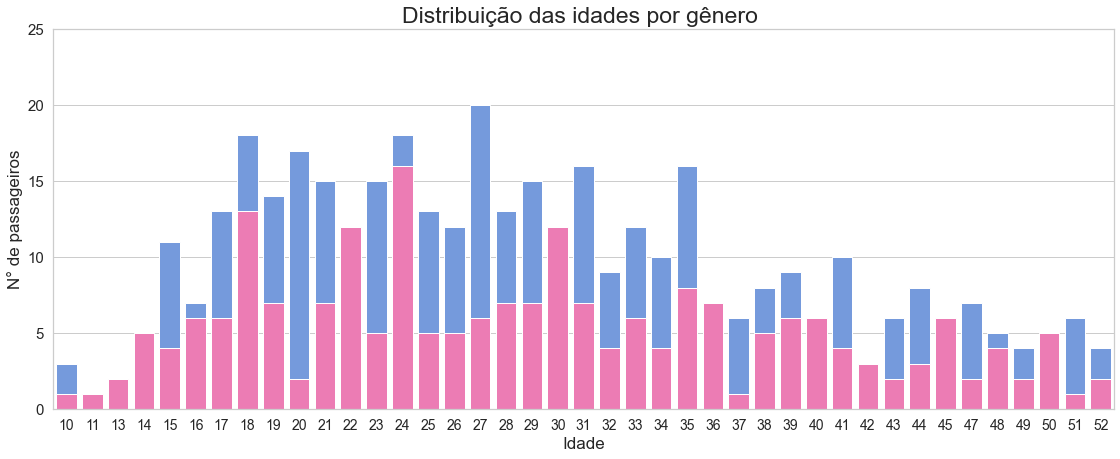

In [139]:
fig = plt.figure(figsize=(19,7))
sns.set_style('whitegrid')
df = train_data
df['idade_homem'] = df[df['Sex'] == 'male']['Age'] #idade das vitimas masculinas
df['idade_homem'] = df['idade_homem'].values.astype(int) #Transformar em int
df['idade_mulher'] = df[df['Sex'] == 'female']['Age'] #idade das vitimas femininas
df['idade_mulher'] = df['idade_mulher'].values.astype(int)
sns.countplot('idade_homem',color='#6495ED',data=df)
sns.countplot('idade_mulher',color='#FF69B4',data=df)
plt.xlim(10.5,51.5)
plt.xlabel('Idade',fontsize=17)
plt.ylabel('N° de passageiros',fontsize=17)
plt.ylim(0,25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.title('Distribuição das idades por gênero ',fontsize=23);

C:\Users\rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


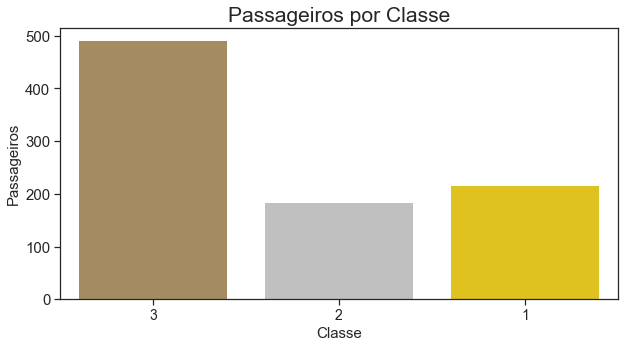

In [166]:
fig = plt.figure(figsize=(10,5))
y = train_data['Pclass'].count()
sns.countplot('Pclass',order=[3,2,1],palette=paleta_tipo_vitima,data=train_data)
plt.xlim(-0.5,2.5)
plt.title('Passageiros por Classe',fontsize=21)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Classe', fontsize=15)
plt.ylabel('Passageiros',fontsize=15);


In [132]:
# Identificamos agora a quantidade de Homens e Mulheres que sobreviveram

women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print(f'Total de mulheres que sobreviveram: {sum(women)}')
print(f'Total de mulheres no navio: {len(women)}')
print('')
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print(f'Total de homens que sobreviveram: {sum(men)}')
print(f'Total de homens no navio: {len(men)}')
print('')
print("% de mulheres que sobreviveram:", rate_women)
print("% de homens que sobreviveram:", rate_men)

Total de mulheres que sobreviveram: 233
Total de mulheres no navio: 314

Total de homens que sobreviveram: 109
Total de homens no navio: 577

% de mulheres que sobreviveram: 0.7420382165605095
% de homens que sobreviveram: 0.18890814558058924


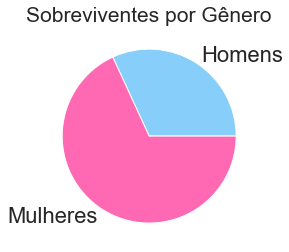

In [133]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(4,4))
sns.set_style('ticks')
sexo_num = [sum(men),sum(women)]
plt.pie(sexo_num, labels=['Homens','Mulheres'],colors=paleta_genero)
plt.title('Sobreviventes por Gênero',fontsize=21);

### Percebemos que o número de mulheres é significantemente maior que o número de homens. 

# Montando modelo de ML

In [167]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('resultado.csv', index=False)
print("Modelo salvo como 'resultado.csv'")

Modelo salvo como 'resultado.csv'


# Explorando o resultado

In [168]:
resultado = pd.read_csv("resultado.csv")
resultado.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
